In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk

In [3]:
df = pd.read_csv('/Users/abhishekwaghchaure/Desktop/Datasets/email/preprocessed_emails.csv')
df.head()

,file,headers,body,subject,from,to,clean_body,processed_body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast\n\n,NaN,phillip.allen@enron.com,tim.belden@enron.com,Here is our forecast,"[['Here', 'forecast']]"
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,Re:,phillip.allen@enron.com,john.lavorato@enron.com,Traveling to have a business meeting takes the...,"[['Traveling', 'business', 'meeting', 'takes',..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,Re: test,phillip.allen@enron.com,leah.arsdall@enron.com,test successful way to go,"[['test', 'successful', 'way', 'go']]"
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy,\n\n Can you send me a schedule of the s...",NaN,phillip.allen@enron.com,randall.gay@enron.com,Randy Can you send me a schedule of the salary...,"[['Randy', 'Can', 'send', 'schedule', 'salary'..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,Re: Hello,phillip.allen@enron.com,greg.piper@enron.com,Lets shoot for Tuesday at 1145,"[['Lets', 'shoot', 'Tuesday', '1145']]"


## Dataset Overview

In [7]:
print('\n Dataset Info')
print(df.info())


 Basic Stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   file            517401 non-null  object
 1   headers         517401 non-null  object
 2   body            517401 non-null  object
 3   subject         498214 non-null  object
 4   from            517401 non-null  object
 5   to              508258 non-null  object
 6   clean_body      517256 non-null  object
 7   processed_body  517401 non-null  object
dtypes: object(8)
memory usage: 31.6+ MB
None


In [14]:
print('\n Basic Stats')
df.describe(include = 'object')


 Basic Stats


,file,headers,body,subject,from,to,clean_body,processed_body
count,517401,517401,517401,498214,517401,508258,517256,517401
unique,517401,517401,249013,158858,20328,52633,242310,242102
top,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"As you know, Enron Net Works (ENW) and Enron G...",RE:,kay.mann@enron.com,pete.davis@enron.com,Please see attached,[[]]
freq,1,1,112,6477,16735,9155,150,252


## Text Length Anlaysis

In [20]:
df['email_length'] = df['processed_body'].apply(len)
df['email_length'].describe()

count    5.174010e+05
mean     1.781332e+03
std      7.627899e+03
min      4.000000e+00
25%      2.900000e+02
50%      7.620000e+02
75%      1.714000e+03
max      2.046173e+06
Name: email_length, dtype: float64

In [26]:
df['email_length']

0           22
1          797
2           37
3          175
4           38
          ... 
517396     407
517397      99
517398     335
517399     223
517400    2998
Name: email_length, Length: 517401, dtype: int64

In [30]:
max(df['email_length'])

2046173

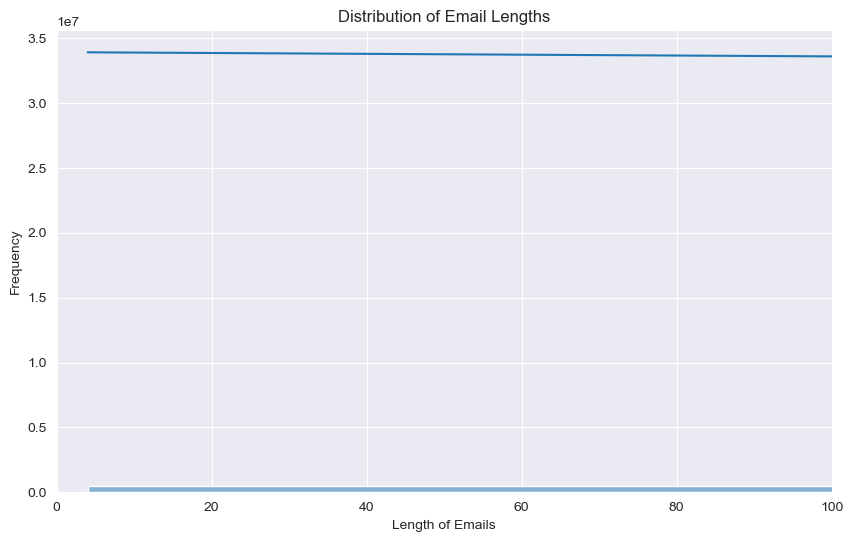

In [35]:
## Distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['email_length'], bins=10, kde=True)
plt.title("Distribution of Email Lengths")
plt.xlim(0, 100)  # Set `max_reasonable_length` to an appropriate value.
plt.xlabel("Length of Emails")
plt.ylabel("Frequency")
plt.show()

## Most Frequent Words in Email Body

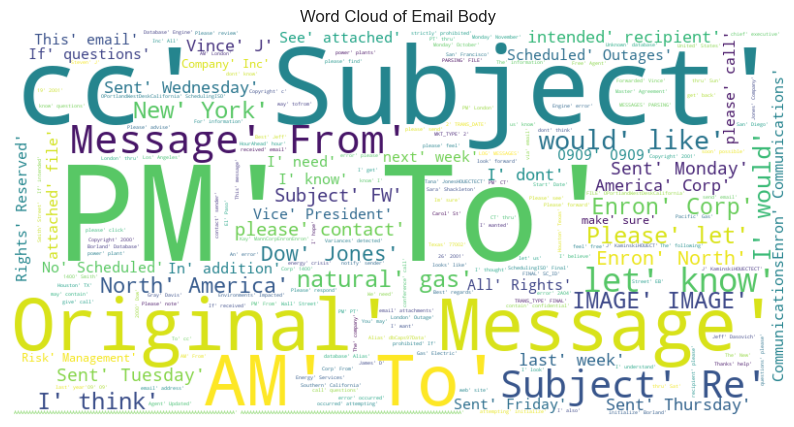

In [40]:
all_text = ' '.join(df['processed_body'])
word_counts = Counter(nltk.word_tokenize(all_text))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Email Body")
plt.show()

## Sender and Recipients Patterns


In [41]:
top_senders = df['from'].value_counts().head(10)
print("\nTop 10 Senders:")
print(top_senders)


Top 10 Senders:
from
kay.mann@enron.com               16735
vince.kaminski@enron.com         14368
jeff.dasovich@enron.com          11411
pete.davis@enron.com              9149
chris.germany@enron.com           8801
sara.shackleton@enron.com         8777
enron.announcements@enron.com     8587
tana.jones@enron.com              8490
steven.kean@enron.com             6759
kate.symes@enron.com              5438
Name: count, dtype: int64


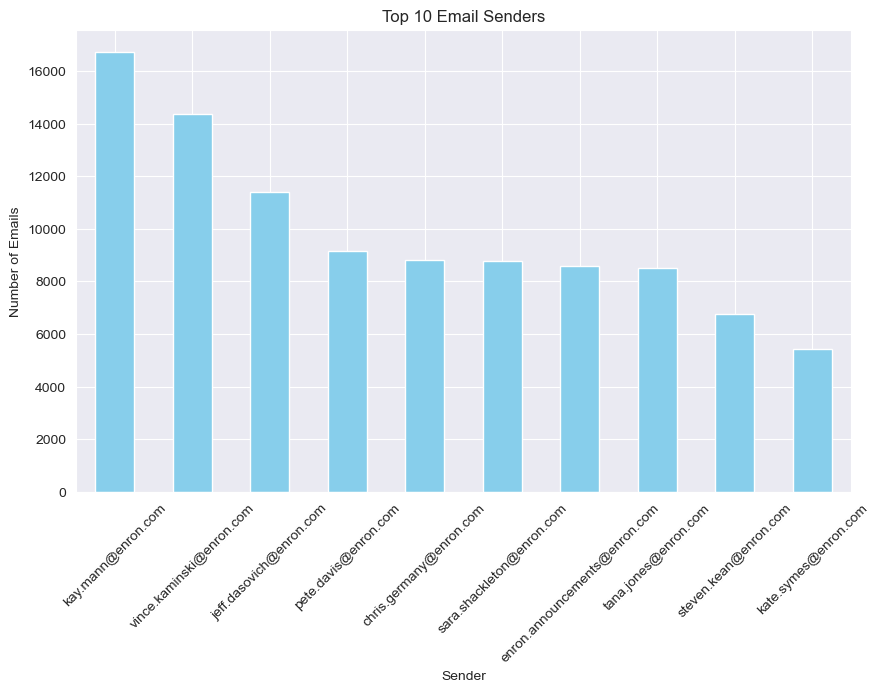

In [43]:
plt.figure(figsize=(10, 6))
top_senders.plot(kind='bar', color='skyblue')
plt.title("Top 10 Email Senders")
plt.xlabel("Sender")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.show()

In [42]:
top_recipients = df['to'].value_counts().head(10)
print("\nTop 10 Recipients:")
print(top_recipients)


Top 10 Recipients:
to
pete.davis@enron.com         9155
tana.jones@enron.com         5677
sara.shackleton@enron.com    4974
vkaminski@aol.com            4870
jeff.dasovich@enron.com      4350
kate.symes@enron.com         3517
all.worldwide@enron.com      3324
mark.taylor@enron.com        3295
kay.mann@enron.com           3085
gerald.nemec@enron.com       3074
Name: count, dtype: int64


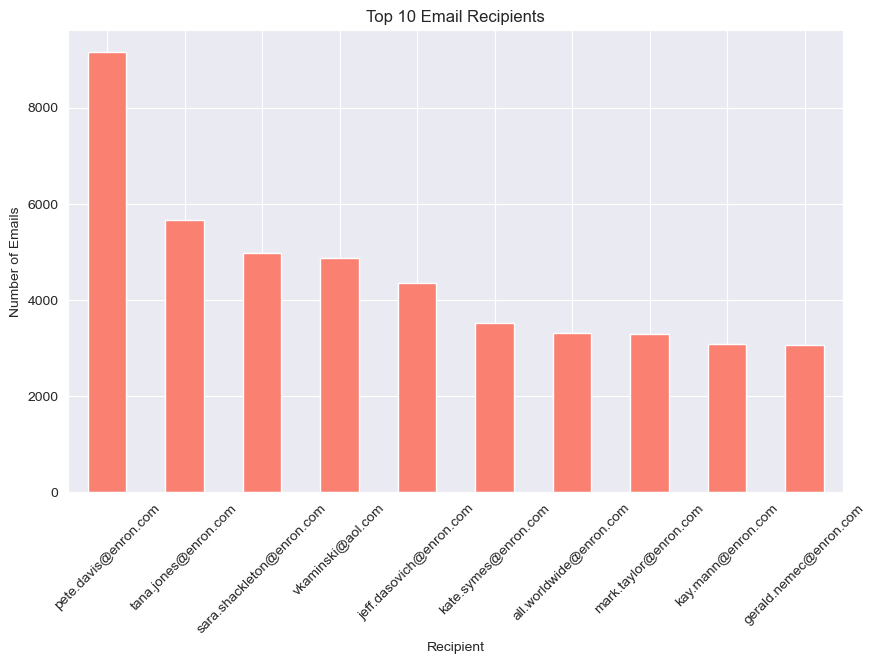

In [44]:
plt.figure(figsize=(10, 6))
top_recipients.plot(kind='bar', color='salmon')
plt.title("Top 10 Email Recipients")
plt.xlabel("Recipient")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.show()

## Subject Analysis

In [45]:
top_subjects = df['subject'].value_counts().head(10)
print("\nTop 10 Subjects:")
print(top_subjects)


Top 10 Subjects:
subject
RE:                                                      6477
Re:                                                      6308
Demand Ken Lay Donate Proceeds from Enron Stock Sales    1124
FW:                                                       938
Schedule Crawler: HourAhead Failure                       900
Schedule Crawler: HourAhead Failure <CODESITE>            800
Enron Mentions                                            784
EnTouch Newsletter                                        518
Organizational Announcement                               378
Energy Issues                                             369
Name: count, dtype: int64


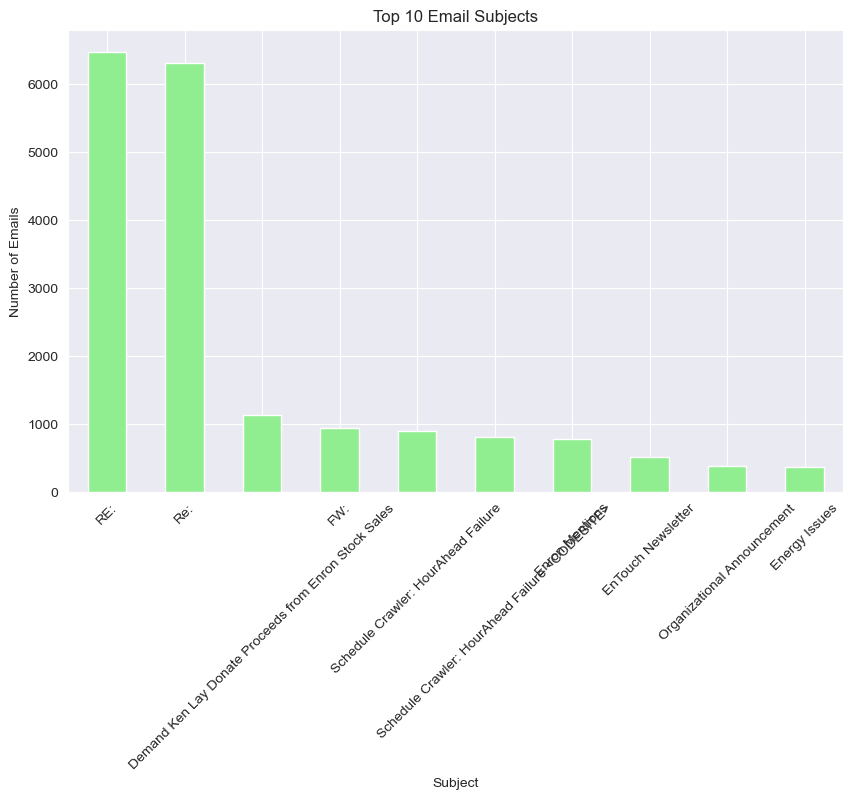

In [46]:
plt.figure(figsize=(10, 6))
top_subjects.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Email Subjects")
plt.xlabel("Subject")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.show()

## Final EDA Summary